In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RidgeCV, LassoCV

import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# AllCandidates(2022)

In [ ]:
cand = pd.read_csv("/content/data/candidate_summary_2022-2.csv")
cand.head()

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/H2CA01185/?...,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/S2MO00502/?...,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,OPEN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S2FL00532/?...,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,https://www.fec.gov/data/candidate/H2AZ04200/?...,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,https://www.fec.gov/data/candidate/S2WI00367/?...,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
selected_columns = [
    'Cand_Name',
    'Cand_Id',
    'Cand_Office',
    'Cand_Office_St',
    'Cand_Office_Dist',
    'Cand_Party_Affiliation',
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Total_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan',
    'Total_Loan'
]

filtered_cand = cand[selected_columns]
filtered_cand.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan
0,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# House and Senate results (2022)

In [ ]:
senate_results = pd.read_csv("/content/data/7. US Senate Results by State-Table 1.csv")
senate_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,S,S2AL00145,NaN,Katie,Britt,"Britt, Katie",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,S,S8AL00381,NaN,Mo,Brooks,"Brooks, Mo",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,S,S2AL00202,NaN,Mike,Durant,"Durant, Mike",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,S,S2AL00160,NaN,Jake,Schafer,"Schafer, Jake",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
house_results = pd.read_csv("/content/data/8. US House Results by State-Table 1.csv")
house_results.head()

,1,STATE ABBREVIATION,STATE,DISTRICT,FEC ID,(I) INCUMBENT INDICATOR,CANDIDATE NAME (First),CANDIDATE NAME (Last),CANDIDATE NAME,TOTAL VOTES,...,COMBINED GE PARTY % (when applicable),PE WINNER INDICATOR,GE WINNER INDICATOR,FOOTNOTES,1ST ROUND RCV VOTES,1ST ROUND RCV %,2ND ROUND RCV VOTES,2ND ROUND RCV %,3RD ROUND RCV VOTES,3RD ROUND RCV %
0,2,AL,Alabama,NaN,NaN,NaN,NaN,NaN,DISTRICT 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,AL,Alabama,01,H0AL01055,(I),Jerry,Carl,"Carl, Jerry",NaN,...,NaN,W,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,AL,Alabama,01,H2AL01218,NaN,Alexander M.,Remrey,"Remrey, Alexander M.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,AL,Alabama,01,NaN,NaN,NaN,Scattered,Scattered,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,AL,Alabama,01,NaN,NaN,NaN,NaN,NaN,District Votes:,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
senate_winners = senate_results[senate_results["GE WINNER INDICATOR"] == "W"][["STATE", "FEC ID", "CANDIDATE NAME", "GENERAL %"]].copy()
senate_winners["Office"] = "Senate"

house_winners = house_results[house_results["GE WINNER INDICATOR"] == "W"][["STATE", "FEC ID", "CANDIDATE NAME", "GENERAL %"]].copy()
house_winners["Office"] = "House"

all_winners = pd.concat([senate_winners, house_winners], ignore_index=True)

all_winners.columns = ["State", "FEC ID", "Candidate", "General_Percent", "Office"]

all_winners["General_Percent"] = (
    all_winners["General_Percent"]
    .str.replace("%", "", regex=False)
    .str.strip()
    .astype(float)
)

all_winners.head()

,State,FEC ID,Candidate,General_Percent,Office
0,Alabama,S2AL00145,"Britt, Katie",66.62,Senate
1,Alaska,S4AK00099,"Murkowski, Lisa",43.37,Senate
2,Arizona,S0AZ00350,"Kelly, Mark",51.39,Senate
3,Arkansas,S0AR00150,"Boozman, John",65.73,Senate
4,California,S2CA00955,"Padilla, Alex",60.89,Senate


In [ ]:
merged_df = filtered_cand.merge(all_winners[["FEC ID", "General_Percent"]], left_on="Cand_Id", right_on="FEC ID", how="left")
merged_df.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan,FEC ID,General_Percent
0,"GODFREY, MARCUS SCOTT",H2CA01185,H,CA,1.0,LIB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,"NICHOLAS CRANE, STRAUSS",S2MO00502,S,MO,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,"PINNEY, DWAYNE",S2FL00532,S,FL,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,"DEHART, VAUGHAN BRANDON BRENDAN",H2AZ04200,H,AZ,4.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,"NEUBERT, KEITH",S2WI00367,S,WI,0.0,REP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
merged_df_clean = merged_df.dropna(subset=["General_Percent"])
merged_df_clean.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Total_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,Total_Loan,FEC ID,General_Percent
99,"BUSH, CORI",H8MO01143,H,MO,1.0,DEM,2448937.35,2236989.39,0.0,0.0,144949.24,2381938.63,58124.70,0.0,0.0,0.0,H8MO01143,72.86
105,"KENNEDY, JOHN NEELY",S4LA00065,S,LA,0.0,REP,34338881.57,32141730.16,0.0,0.0,1332064.68,33473794.84,582253.98,0.0,0.0,0.0,S4LA00065,61.56
283,"WENSTRUP, BRAD DR.",H2OH02085,H,OH,2.0,REP,2088194.25,774831.55,0.0,0.0,1204950.00,1979781.55,105757.87,0.0,0.0,0.0,H2OH02085,74.50
335,"KIM, YOUNG",H8CA39240,H,CA,40.0,REP,9340940.92,6870711.32,0.0,5000.0,1647272.10,8522983.42,751424.24,0.0,0.0,0.0,H8CA39240,56.84
339,"BAIRD, JAMES R DR.",H8IN04199,H,IN,4.0,REP,434679.53,187413.86,0.0,0.0,243379.50,430793.36,3354.17,0.0,0.0,0.0,H8IN04199,68.22


# Training GLM (KNN & RF)

In [ ]:
features = [
 'Total_Receipt',
 'Individual_Contribution',
 'Cand_Contribution',
 'Party_Committee_Contribution',
 'Other_Committee_Contribution',
 'Total_Contribution',
 'Transfer_From_Other_Auth_Committee',
 'Cand_Loan',
 'Other_Loan',
 'Total_Loan'
]

In [ ]:
X = merged_df_clean[features]
y = merged_df_clean['General_Percent']

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_rmse = mean_squared_error(y_test, y_pred_knn)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

(knn_r2, knn_rmse), (rf_r2, rf_rmse)

((-0.15342880668348213, 283.8613505777778),
 (0.1438924322499926, 210.68994376872766))

OLS model

In [ ]:
numeric_features = [
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Total_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan',
    'Total_Loan'
]

X_ols = merged_df_clean[numeric_features]
y_ols = merged_df_clean['General_Percent']

X_ols_const = sm.add_constant(X_ols)

ols_model = sm.OLS(y_ols, X_ols_const).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        General_Percent   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.002
Date:                Tue, 13 May 2025   Prob (F-statistic):             0.0448
Time:                        05:28:19   Log-Likelihood:                -1877.9
No. Observations:                 448   AIC:                             3774.
Df Residuals:                     439   BIC:                             3811.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Plots

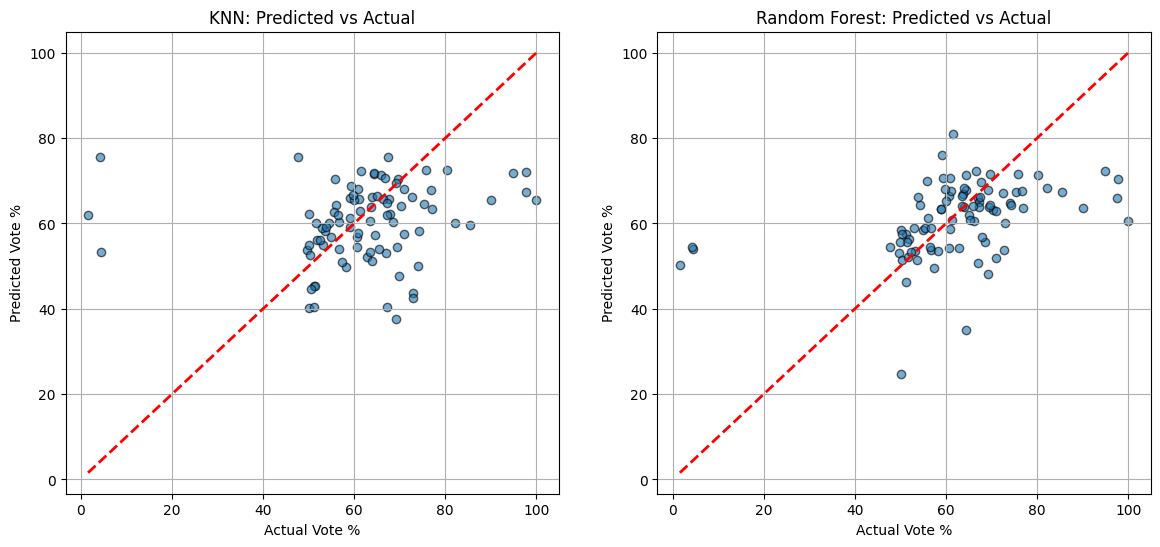

In [ ]:
plt.figure(figsize=(14, 6))

# KNN plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('KNN: Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

# RF plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6, edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

plt.show()

# Adjustments based on first plot


In [ ]:
numeric_features = [
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Total_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan',
    'Total_Loan'
]
categorical_features = ['Cand_Office', 'Cand_Party_Affiliation']

X = merged_df_clean[numeric_features + categorical_features]
y = merged_df_clean['General_Percent']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_pipeline.fit(X_train, y_train)
y_pred_knn = knn_pipeline.predict(X_test)

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

knn_r2_scaled = r2_score(y_test, y_pred_knn)
knn_rmse_scaled = mean_squared_error(y_test, y_pred_knn)

rf_r2_scaled = r2_score(y_test, y_pred_rf)
rf_rmse_scaled = mean_squared_error(y_test, y_pred_rf)

(knn_r2_scaled, knn_rmse_scaled), (rf_r2_scaled, rf_rmse_scaled)

((0.03417877434360883, 237.6907148), (0.14571270570642914, 210.24197049220558))

# New Plots

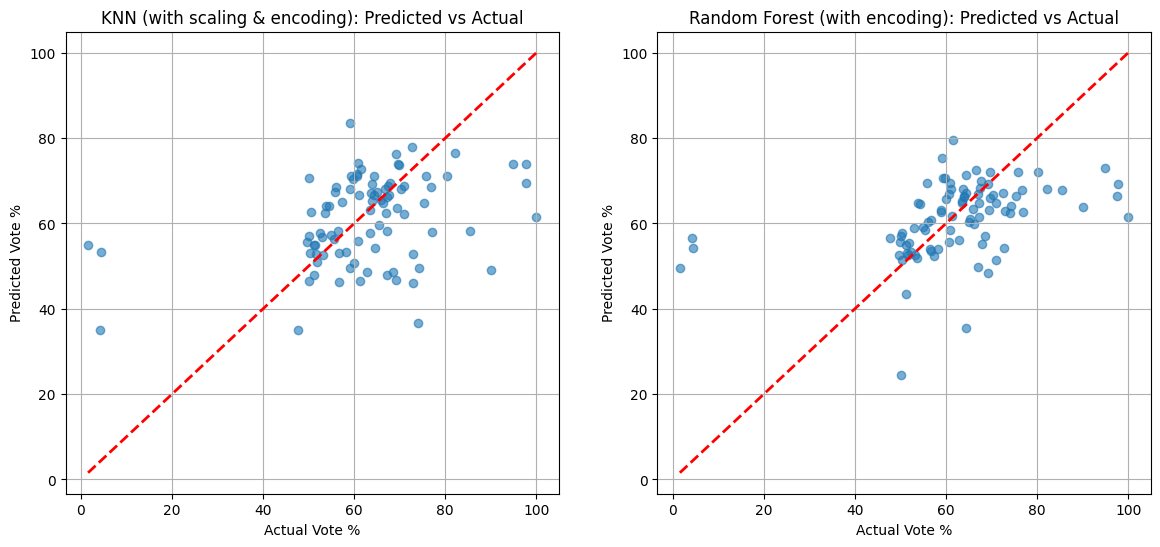

In [ ]:
plt.figure(figsize=(14, 6))

# KNN plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('KNN (with scaling & encoding): Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

# RF plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.title('Random Forest (with encoding): Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

plt.show()

# Comparison

In [ ]:
report_data = {
    "Model": ["KNN", "KNN (scaled+encoded)", "Random Forest", "Random Forest (encoded)"],
    "R² Score": [
        knn_r2, knn_r2_scaled,
        rf_r2, rf_r2_scaled
    ],
    "RMSE": [
        knn_rmse, knn_rmse_scaled,
        rf_rmse, rf_rmse_scaled
    ]
}

report_df = pd.DataFrame(report_data)
report_df

,Model,R² Score,RMSE
0,KNN,-0.153429,283.861351
1,KNN (scaled+encoded),0.034179,237.690715
2,Random Forest,0.143892,210.689944
3,Random Forest (encoded),0.145713,210.241970


KNN benefited significantly from scaling and encoding, improving its R² and reducing RMSE.

# Improve model by removing redundant features, and adding more helpful features. (log transformation too)



I noticed that some columns are dependable on others, which makes the model more redundent. For example, individual contribution contributes to the total contribution. So we are going to clean the table.

In [ ]:
df_clean = merged_df_clean.copy()

# 'Total_Contribution' is the sum of: Individual_Contribution + Cand_Contribution + Party_Committee_Contribution + Other_Committee_Contribution
# 'Total_Loan' is the sum of: Cand_Loan + Other_Loan

columns_to_remove = [
    'Total_Contribution',
    'Total_Loan'
]

df_reduced = df_clean.drop(columns=columns_to_remove)
df_reduced.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,FEC ID,General_Percent
99,"BUSH, CORI",H8MO01143,H,MO,1.0,DEM,2448937.35,2236989.39,0.0,0.0,144949.24,58124.70,0.0,0.0,H8MO01143,72.86
105,"KENNEDY, JOHN NEELY",S4LA00065,S,LA,0.0,REP,34338881.57,32141730.16,0.0,0.0,1332064.68,582253.98,0.0,0.0,S4LA00065,61.56
283,"WENSTRUP, BRAD DR.",H2OH02085,H,OH,2.0,REP,2088194.25,774831.55,0.0,0.0,1204950.00,105757.87,0.0,0.0,H2OH02085,74.50
335,"KIM, YOUNG",H8CA39240,H,CA,40.0,REP,9340940.92,6870711.32,0.0,5000.0,1647272.10,751424.24,0.0,0.0,H8CA39240,56.84
339,"BAIRD, JAMES R DR.",H8IN04199,H,IN,4.0,REP,434679.53,187413.86,0.0,0.0,243379.50,3354.17,0.0,0.0,H8IN04199,68.22


Now we are adding new features to improve our models. For example, binary features like Republican/Democrats and so on

In [ ]:
df = df_reduced.copy()

df["is_democrat"] = (df["Cand_Party_Affiliation"] == "DEM").astype(int)
df["is_republican"] = (df["Cand_Party_Affiliation"] == "REP").astype(int)
df["is_senate"] = (df["Cand_Office"] == "S").astype(int)

df.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,Other_Committee_Contribution,Transfer_From_Other_Auth_Committee,Cand_Loan,Other_Loan,FEC ID,General_Percent,is_democrat,is_republican,is_senate
99,"BUSH, CORI",H8MO01143,H,MO,1.0,DEM,2448937.35,2236989.39,0.0,0.0,144949.24,58124.70,0.0,0.0,H8MO01143,72.86,1,0,0
105,"KENNEDY, JOHN NEELY",S4LA00065,S,LA,0.0,REP,34338881.57,32141730.16,0.0,0.0,1332064.68,582253.98,0.0,0.0,S4LA00065,61.56,0,1,1
283,"WENSTRUP, BRAD DR.",H2OH02085,H,OH,2.0,REP,2088194.25,774831.55,0.0,0.0,1204950.00,105757.87,0.0,0.0,H2OH02085,74.50,0,1,0
335,"KIM, YOUNG",H8CA39240,H,CA,40.0,REP,9340940.92,6870711.32,0.0,5000.0,1647272.10,751424.24,0.0,0.0,H8CA39240,56.84,0,1,0
339,"BAIRD, JAMES R DR.",H8IN04199,H,IN,4.0,REP,434679.53,187413.86,0.0,0.0,243379.50,3354.17,0.0,0.0,H8IN04199,68.22,0,1,0


Adding log-transformation

In [ ]:
df_transformed = df.copy()

financial_vars = [
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan'
]

for col in financial_vars:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

df_transformed["indiv_to_total"] = (df_transformed["Individual_Contribution"] / df_transformed["Total_Receipt"]).replace([np.inf, -np.inf], np.nan).fillna(0)
df_transformed["loan_to_total"] = ((df_transformed["Cand_Loan"] + df_transformed["Other_Loan"]) / df_transformed["Total_Receipt"]).replace([np.inf, -np.inf], np.nan).fillna(0)

df_transformed.head()

,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Total_Receipt,Individual_Contribution,Cand_Contribution,Party_Committee_Contribution,...,log_Total_Receipt,log_Individual_Contribution,log_Cand_Contribution,log_Party_Committee_Contribution,log_Other_Committee_Contribution,log_Transfer_From_Other_Auth_Committee,log_Cand_Loan,log_Other_Loan,indiv_to_total,loan_to_total
99,"BUSH, CORI",H8MO01143,H,MO,1.0,DEM,2448937.35,2236989.39,0.0,0.0,...,14.711165,14.620642,0.0,0.000000,11.884146,10.970363,0.0,0.0,0.913453,0.0
105,"KENNEDY, JOHN NEELY",S4LA00065,S,LA,0.0,REP,34338881.57,32141730.16,0.0,0.0,...,17.351789,17.285666,0.0,0.000000,14.102241,13.274664,0.0,0.0,0.936016,0.0
283,"WENSTRUP, BRAD DR.",H2OH02085,H,OH,2.0,REP,2088194.25,774831.55,0.0,0.0,...,14.551811,13.560402,0.0,0.000000,14.001949,11.568917,0.0,0.0,0.371053,0.0
335,"KIM, YOUNG",H8CA39240,H,CA,40.0,REP,9340940.92,6870711.32,0.0,5000.0,...,16.049918,15.742778,0.0,8.517393,14.314632,13.529727,0.0,0.0,0.735548,0.0
339,"BAIRD, JAMES R DR.",H8IN04199,H,IN,4.0,REP,434679.53,187413.86,0.0,0.0,...,12.982367,12.141080,0.0,0.000000,12.402381,8.118258,0.0,0.0,0.431154,0.0


training new models

In [ ]:
feature_cols = [
    'log_Total_Receipt',
    'log_Individual_Contribution',
    'log_Cand_Contribution',
    'log_Party_Committee_Contribution',
    'log_Other_Committee_Contribution',
    'log_Transfer_From_Other_Auth_Committee',
    'log_Cand_Loan',
    'log_Other_Loan',
    'indiv_to_total',
    'loan_to_total',
    'is_democrat',
    'is_republican',
    'is_senate'
]

X = df_transformed[feature_cols]
y = df_transformed["General_Percent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), feature_cols)],
    remainder='passthrough'
)

knn_model = Pipeline([
    ('scale', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

rf_model = Pipeline([
    ('scale', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_rmse = mean_squared_error(y_test, y_pred_knn)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf)

(knn_r2, knn_rmse), (rf_r2, rf_rmse)

((0.05477085168089302, 232.62295955555552),
 (0.1807238114811175, 201.6256608310999))

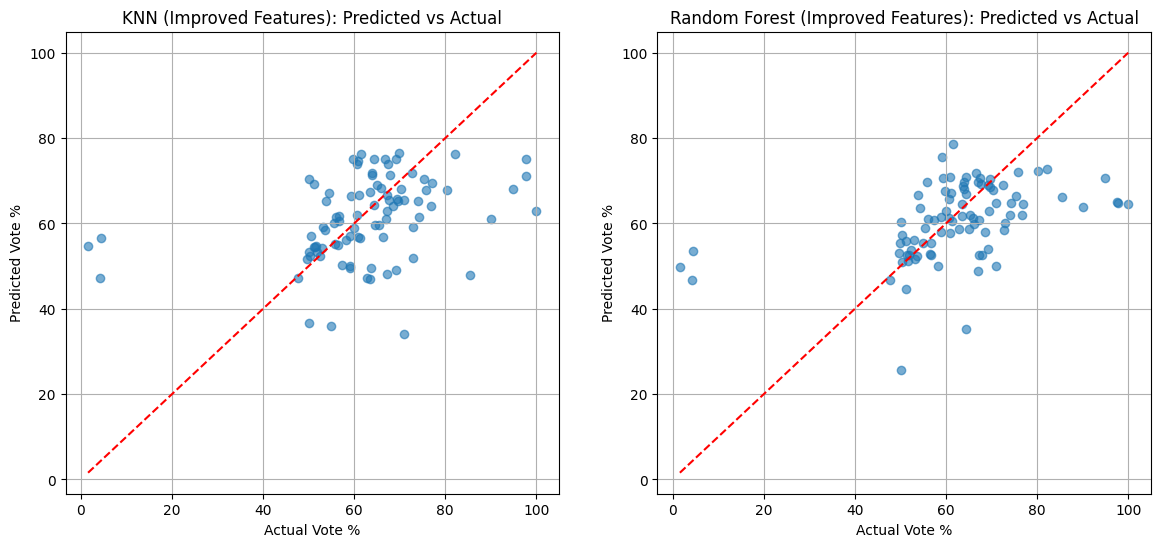

In [ ]:
plt.figure(figsize=(14, 6))

# KNN plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_knn, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('KNN (Improved Features): Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

# RF plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Random Forest (Improved Features): Predicted vs Actual')
plt.xlabel('Actual Vote %')
plt.ylabel('Predicted Vote %')
plt.grid(True)

plt.show()

In [ ]:
df_transformed["is_democrat"] = (df_transformed["Cand_Party_Affiliation"] == "DEM").astype(int)
df_transformed["is_republican"] = (df_transformed["Cand_Party_Affiliation"] == "REP").astype(int)
df_transformed["is_senate"] = (df_transformed["Cand_Office"] == "S").astype(int)

log_features = [
    'Total_Receipt',
    'Individual_Contribution',
    'Cand_Contribution',
    'Party_Committee_Contribution',
    'Other_Committee_Contribution',
    'Transfer_From_Other_Auth_Committee',
    'Cand_Loan',
    'Other_Loan'
]
for col in log_features:
    df_transformed[f'log_{col}'] = np.log1p(df_transformed[col])

df_transformed["indiv_to_total"] = (
    df_transformed["Individual_Contribution"] / df_transformed["Total_Receipt"]
).replace([np.inf, -np.inf], np.nan).fillna(0)
df_transformed["loan_to_total"] = (
    (df_transformed["Cand_Loan"] + df_transformed["Other_Loan"]) / df_transformed["Total_Receipt"]
).replace([np.inf, -np.inf], np.nan).fillna(0)

df_transformed = df_transformed.dropna(subset=["General_Percent"])

X_glm = df_transformed[[
    'log_Total_Receipt',
    'log_Individual_Contribution',
    'log_Cand_Contribution',
    'log_Party_Committee_Contribution',
    'log_Other_Committee_Contribution',
    'log_Transfer_From_Other_Auth_Committee',
    'log_Cand_Loan',
    'log_Other_Loan',
    'indiv_to_total',
    'loan_to_total',
    'is_democrat',
    'is_republican',
    'is_senate'
]]
y_glm = df_transformed['General_Percent']
X_glm_const = sm.add_constant(X_glm)

glm_model = sm.GLM(y_glm, X_glm_const, family=sm.families.Gaussian(sm.families.links.identity()))
glm_results = glm_model.fit()

glm_results.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        General_Percent   No. Observations:                  448
Model:                            GLM   Df Residuals:                      434
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                          235.46
Method:                          IRLS   Log-Likelihood:                -1852.0
Date:                Tue, 13 May 2025   Deviance:                   1.0219e+05
Time:                        05:28:21   Pearson chi2:                 1.02e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1473
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     83.3916     12.346      6.754      0.000      59.194     107.590
log_Total_Receipt                          5.0734      4.590      1.105      0.269      -3.922      14.069
log_Individual_Contribution               -7.9123      5.088     -1.555      0.120     -17.885       2.060
log_Cand_Contribution                     -0.8816      0.307     -2.868      0.004      -1.484      -0.279
log_Party_Committee_Contribution          -0.9633      0.191     -5.052      0.000      -1.337      -0.590
log_Other_Committee_Contribution           1.5004      0.637      2.357      0.018       0.253       2.748
log_Transfer_From_Other_Auth_Committee    -0.1219      0.164     -0.743      0.457      -0.443       0.200
log_Cand_Loan                             -0.1720      0.353     -0.487      0.626      -0.864       0.520
log_Other_Loan                            -0.1923      1.525     -0.126      0.900      -3.182       2.797
indiv_to_total                            17.8766     11.539      1.549      0.121      -4.740      40.493
loan_to_total                              6.2790     15.380      0.408      0.683     -23.865      36.423
is_democrat                              -12.0328      9.091     -1.324      0.186     -29.851       5.785
is_republican                             -8.8524      9.060     -0.977      0.329     -26.609       8.905
is_senate                                 -0.0137      2.970     -0.005      0.996      -5.834       5.807
==========================================================================================================
"""

Model: GLM with Gaussian family and identity link (i.e., standard linear regression)

Pseudo R^2: 0.147: The model explains 14.7% of the variation in vote percentage.

Statistically significant effects:

log_Cand_Contribution: Negative effect

log_Party_Committee_Contribution: Negative effect

log_Other_Committee_Contribution: Positive effect

Self-funding (log_Cand_Contribution) has a negative coefficient: higher self-funding may signal lower public support.

Party contributions (log_Party_Committee_Contribution) also have a negative association — possibly because they concentrate on vulnerable candidates.

Other committee contributions have a positive effect and are statistically significant — perhaps a signal of broader institutional support.

Not significant:
Indicators like is_democrat, is_republican, and is_senate are not statistically significant in this setup — possibly due to multicollinearity or lack of variation in a winner-only sample.

In [ ]:
X = df_transformed[[
    'log_Total_Receipt',
    'log_Individual_Contribution',
    'log_Cand_Contribution',
    'log_Party_Committee_Contribution',
    'log_Other_Committee_Contribution',
    'log_Transfer_From_Other_Auth_Committee',
    'log_Cand_Loan',
    'log_Other_Loan',
    'indiv_to_total',
    'loan_to_total',
    'is_democrat',
    'is_republican',
    'is_senate'
]]
y = df_transformed['General_Percent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0, 100.0], cv=5)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], cv=5, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
lasso_pred = lasso.predict(X_test_scaled)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = mean_squared_error(y_test, lasso_pred)

(ridge.alpha_, ridge_r2, ridge_rmse), (lasso.alpha_, lasso_r2, lasso_rmse)

((np.float64(100.0), 0.11373628854555107, 218.11143665199788),
 (np.float64(1.0), 0.13867036934299526, 211.97510486492453))

Lasso slightly outperforms Ridge in both R^2 and RMSE, meaning it explains more variation and predicts more accurately.

Both models outperform unregularized linear regression (R^2 = 0.05 earlier).
However, performance still trails behind Random Forest (R^2 = 0.18, RMSE = 201.6).

this shows that regularization improves linear model generalization, reducing overfitting and improving out-of-sample prediction.

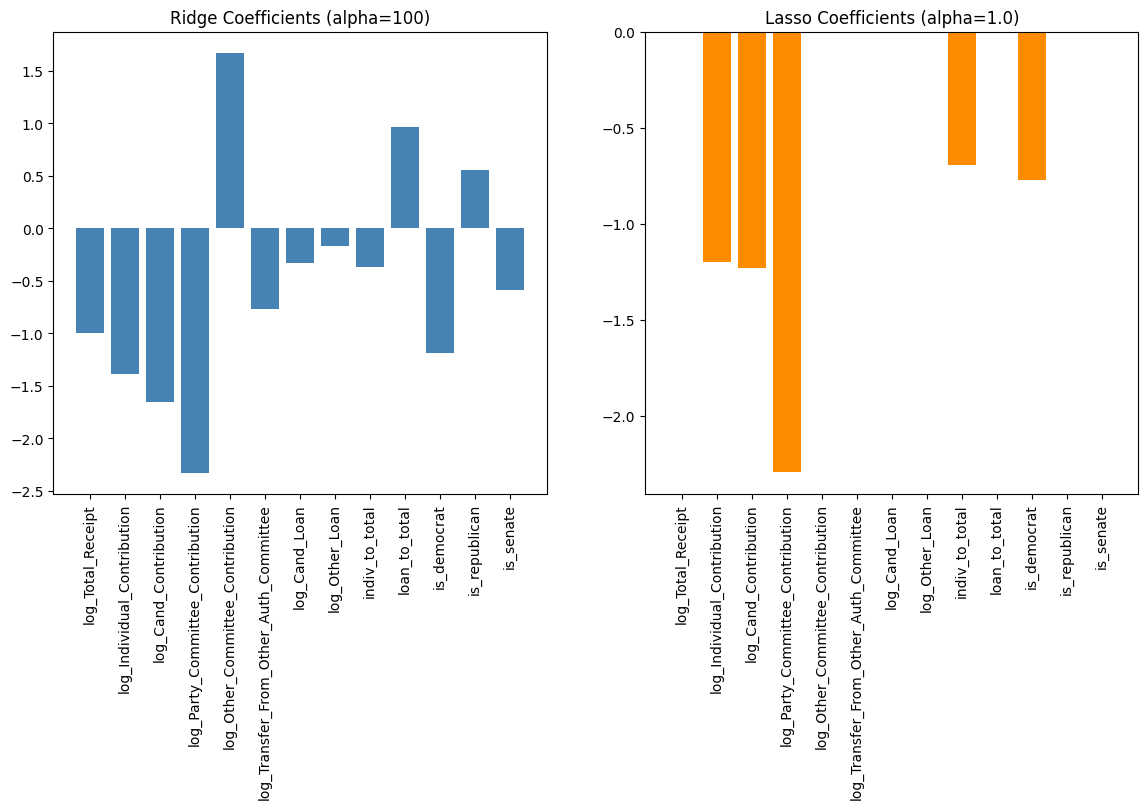

In [ ]:
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_
feature_names = X.columns

plt.figure(figsize=(14, 6))

x = np.arange(len(feature_names))

plt.subplot(1, 2, 1)
plt.bar(x, ridge_coefs, color='steelblue')
plt.xticks(x, feature_names, rotation=90)
plt.title("Ridge Coefficients (alpha=100)")

plt.subplot(1, 2, 2)
plt.bar(x, lasso_coefs, color='darkorange')
plt.xticks(x, feature_names, rotation=90)
plt.title("Lasso Coefficients (alpha=1.0)")

plt.show()